In [ ]:
#### JUST EXploring the Data
Use Case on Simulated Sensor Data
Prognostics
Prognostics is an engineering discipline focused on predicting the time at which a system 
or a component will no longer perform its intended function. 
This lack of performance is most often a failure beyond which the system can no longer be used to meet desired performance.
The predicted time then becomes the remaining useful life (RUL), 
which is an important concept in decision making for contingency mitigation.

https://en.wikipedia.org/wiki/Prognostics

Machine Learning Prognostics for Turbofan Engine Degradation Dataset
Information about the problem is at http://ti.arc.nasa.gov/tech/dash/pcoe/prognostic-data-repository/publications/#turbofan and original data is at http://ti.arc.nasa.gov/tech/dash/pcoe/prognostic-data-repository/#turbofan

The data was originally generated using the Commercial Modular Aero-Propulsion System Simulations (C-MAPPS) system.

## Get an idea of what visually we can gather from our dat sets.

### what limitations is there and what insights can be gathered fast through a brief deep dive into the the data set 


In [82]:
%%time
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import boto3
import re
import requests
import zipfile
import botocore
import matplotlib.pyplot as plt
import seaborn as sns
import importlib
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import random
from scipy.signal import filtfilt
import colorsys
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

from sagemaker import get_execution_role

role = get_execution_role()
region = boto3.Session().region_name

bucket='s3://sagemaker-us-east-1-023375022819/PredictiveMaintenance-Team-9' # put your s3 bucket name here, and create s3 bucket
prefix = 'input/CMAPSSData.zip'#'sagemaker/DEMO-xgboost-regression'
# customize to your bucket where you have stored the data
bucket_path = '{}/{}'.format(bucket, prefix)


#= 'https://s3-{}.amazonaws.com/{}'.format(region,bucket)

#print(bucket)

#r = requests.get('https://s3.console.aws.amazon.com/s3/object/sagemaker-us-east-1-023375022819/PredictiveMaintenance-Team-9/input/CMAPSSData.zip')
#z = zipfile.ZipFile((r.content))
#df = pd.read_csv(r.open('CMAPSSData.zip'))
#rawdata = pandas.read_csv(z.read('CMAPSSData.zip'))

#df = pd.read_csv('CMAPSSData.zip', compression='zip', header=0, sep=' ', quotechar='"')




CPU times: user 80.7 ms, sys: 39 µs, total: 80.7 ms
Wall time: 105 ms


In [83]:
## failed attempt  lol 
# Load the dataset
#FILE_DATA = 'turbofan'
#r = urllib.request.urlretrieve("https://ti.arc.nasa.gov/tech/dash/groups/pcoe/prognostic-data-repository/#turbofan", FILE_DATA)
#print(r)



In [84]:
df1= pd.read_csv('train_FD001.txt') 
## later will need to concat / append all sets

#,'train_FD002.txt','train_FD003.txt','train_FD004.txt')

df1.shape
df3 = pd.read_csv('train_FD001.txt', sep=" ", header=None)
df3.head(100)

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN
5,1,6,-0.0043,-0.0001,100.0,518.67,642.10,1584.47,1398.37,14.62,...,8132.85,8.4108,0.03,391,2388,100.0,38.98,23.3669,NaN,NaN
6,1,7,0.0010,0.0001,100.0,518.67,642.48,1592.32,1397.77,14.62,...,8132.32,8.3974,0.03,392,2388,100.0,39.10,23.3774,NaN,NaN
7,1,8,-0.0034,0.0003,100.0,518.67,642.56,1582.96,1400.97,14.62,...,8131.07,8.4076,0.03,391,2388,100.0,38.97,23.3106,NaN,NaN
8,1,9,0.0008,0.0001,100.0,518.67,642.12,1590.98,1394.80,14.62,...,8125.69,8.3728,0.03,392,2388,100.0,39.05,23.4066,NaN,NaN
9,1,10,-0.0033,0.0001,100.0,518.67,641.71,1591.24,1400.46,14.62,...,8129.38,8.4286,0.03,393,2388,100.0,38.95,23.4694,NaN,NaN


In [85]:
#possible NOISE in the data 

# impact analysis 

cols_nan = df3.columns[df3.isna().any()].tolist()
print('Columns with all nan: \n' + str(cols_nan) + '\n')

cols_const = [ col for col in df3.columns if len(df3[col].unique()) <= 2 ]
print('Columns with all const values: \n' + str(cols_const) + '\n')


df4 = df3.drop(columns=cols_nan)


Columns with all nan: 
[26, 27]

Columns with all const values: 
[4, 5, 9, 10, 14, 20, 22, 23, 26, 27]



In [86]:
df4.shape

(20631, 26)

In [87]:
df4.describe

<bound method NDFrame.describe of         0    1       2       3      4       5       6        7        8   \
0        1    1 -0.0007 -0.0004  100.0  518.67  641.82  1589.70  1400.60   
1        1    2  0.0019 -0.0003  100.0  518.67  642.15  1591.82  1403.14   
2        1    3 -0.0043  0.0003  100.0  518.67  642.35  1587.99  1404.20   
3        1    4  0.0007  0.0000  100.0  518.67  642.35  1582.79  1401.87   
4        1    5 -0.0019 -0.0002  100.0  518.67  642.37  1582.85  1406.22   
5        1    6 -0.0043 -0.0001  100.0  518.67  642.10  1584.47  1398.37   
6        1    7  0.0010  0.0001  100.0  518.67  642.48  1592.32  1397.77   
7        1    8 -0.0034  0.0003  100.0  518.67  642.56  1582.96  1400.97   
8        1    9  0.0008  0.0001  100.0  518.67  642.12  1590.98  1394.80   
9        1   10 -0.0033  0.0001  100.0  518.67  641.71  1591.24  1400.46   
10       1   11  0.0018 -0.0003  100.0  518.67  642.28  1581.75  1400.64   
11       1   12  0.0016  0.0002  100.0  518.67  642.06

In [88]:
##NEW LOOK at cleased and ready data for model consumption

In [89]:
nRowsRead = None
df1 = pd.read_csv('train.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'train.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 128286 rows and 30 columns


In [90]:
df1.head(5)


,186,86,-0.0021,0.0002,100.0,518.67,642.52,1585.68,1408.96,14.62,...,0.03,392,2388,100.0.1,38.82,23.3346,1,0,1.1,0.1
0,194,14,20.0066,0.7000,100.0,491.19,607.34,1479.42,1238.15,9.35,...,0.02,362,2324,100.0,24.54,14.6938,0,1,0,1
1,3,85,0.0028,0.0000,100.0,518.67,643.58,1603.77,1429.53,14.62,...,0.03,398,2388,100.0,38.56,23.0434,0,1,1,0
2,131,79,19.9987,0.7010,100.0,491.19,607.07,1484.72,1245.88,9.35,...,0.02,365,2324,100.0,24.36,14.7281,0,1,1,0
3,222,26,-0.0029,0.0002,100.0,518.67,642.54,1584.14,1394.45,14.62,...,0.03,391,2388,100.0,38.93,23.3415,1,0,0,1
4,31,31,20.0072,0.7000,100.0,491.19,607.98,1495.90,1256.15,9.35,...,0.02,367,2324,100.0,24.38,14.5187,0,1,0,1


In [91]:
# For displaying purposes, pick columns that have between 1 and 50 unique values
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

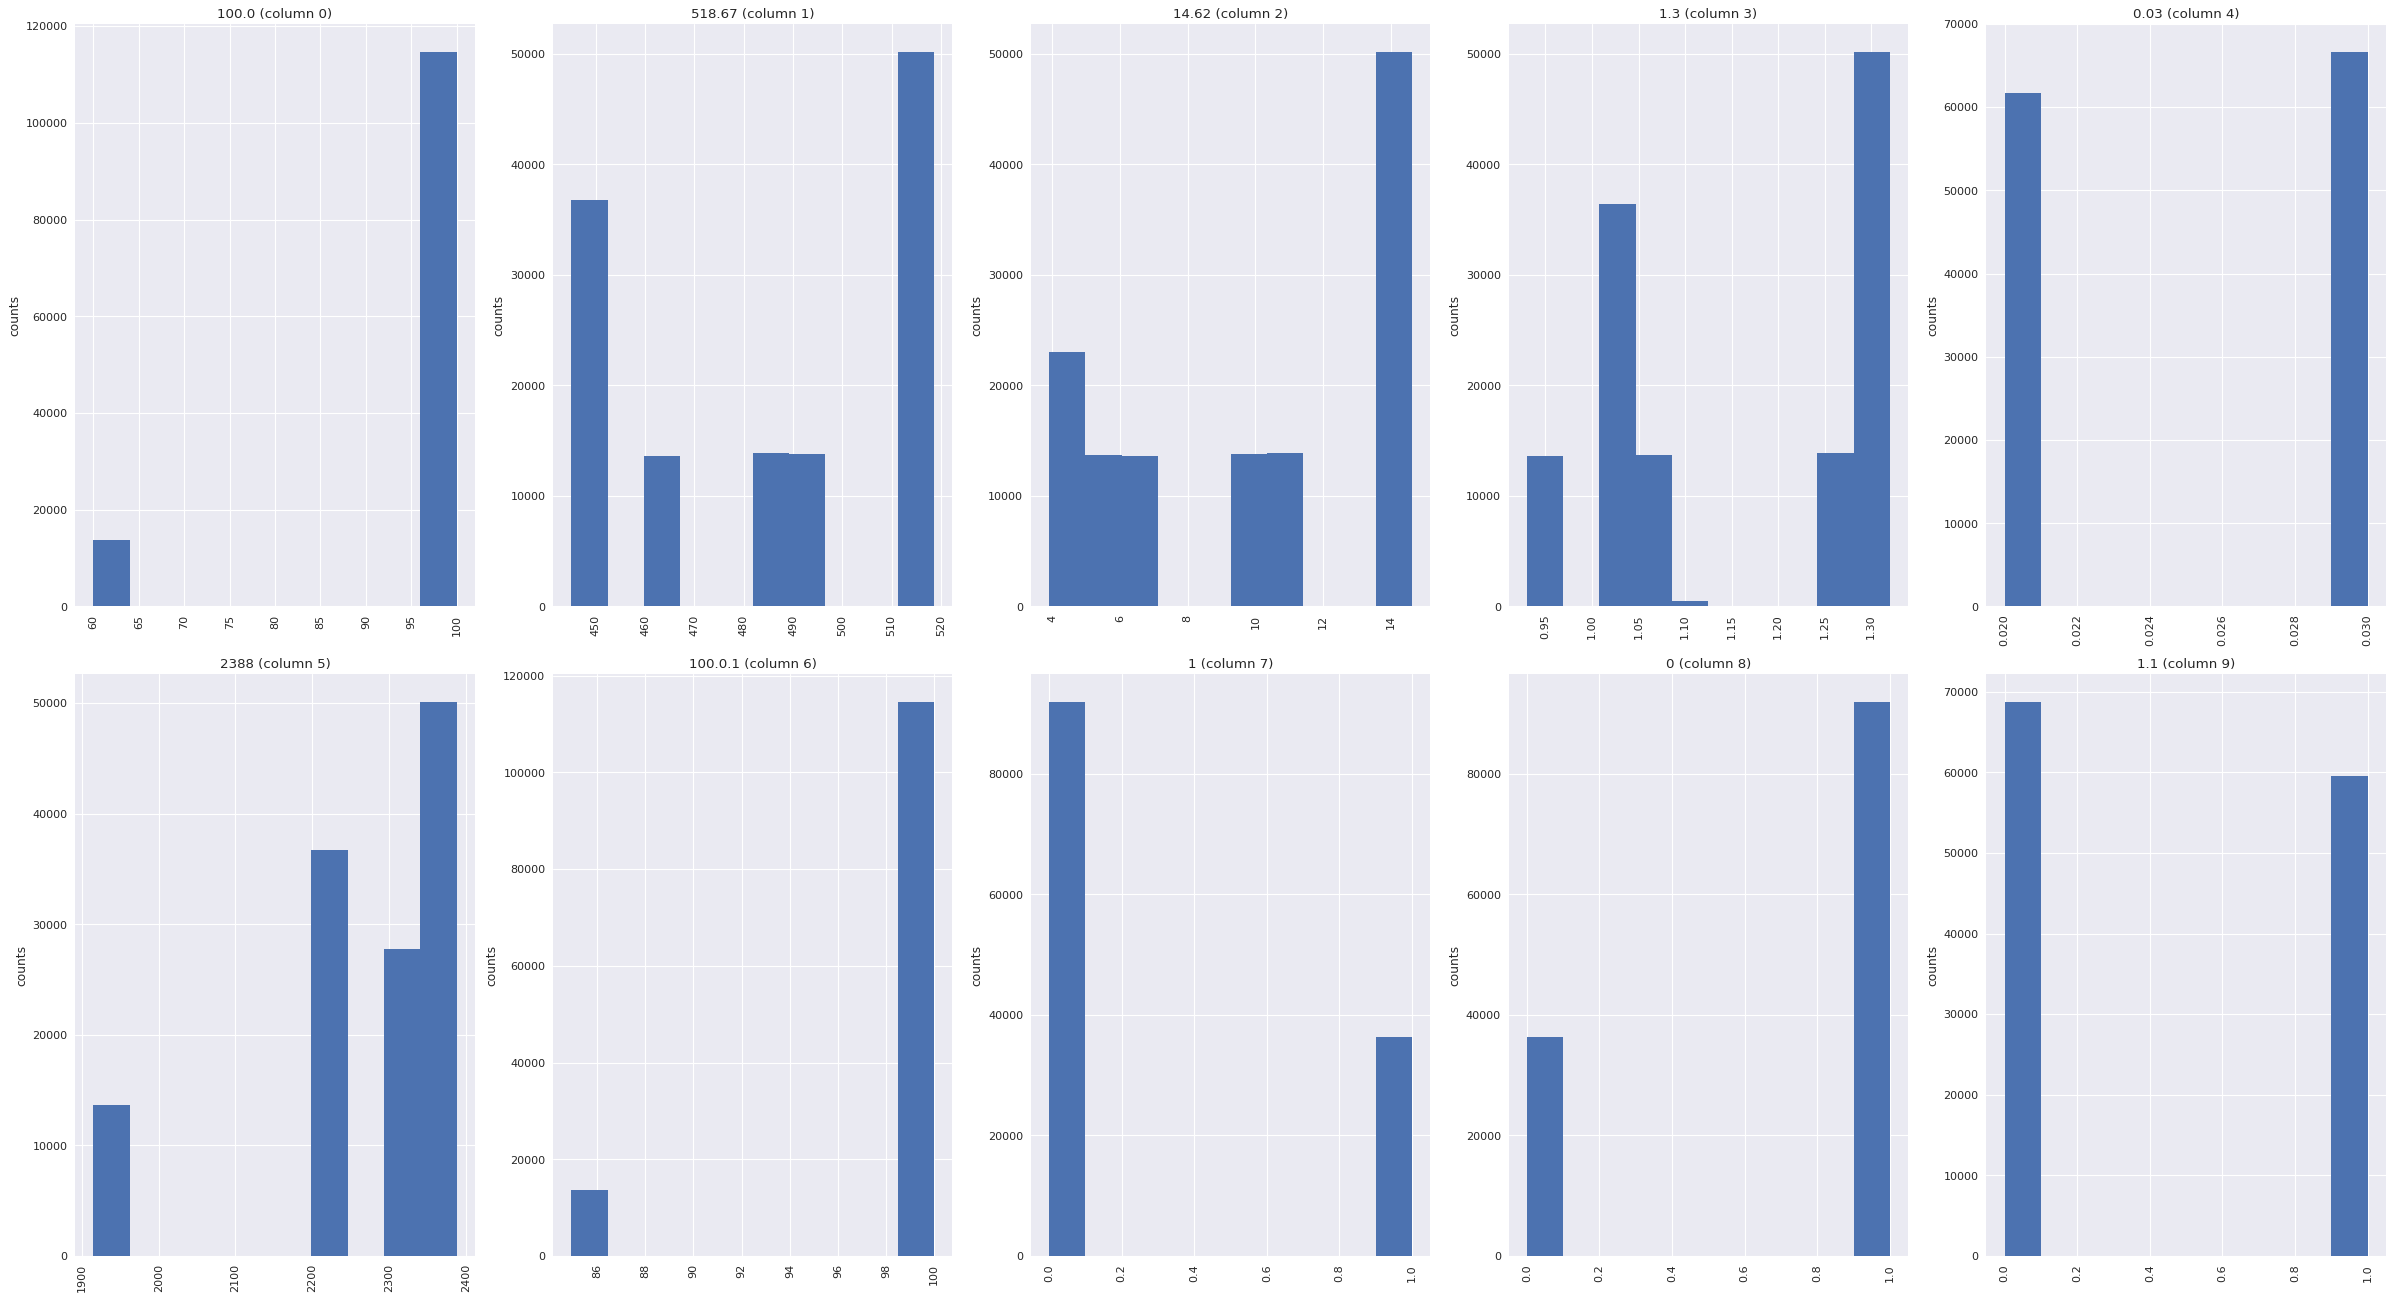

In [92]:
plotPerColumnDistribution(df1, 10, 5)

In [93]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

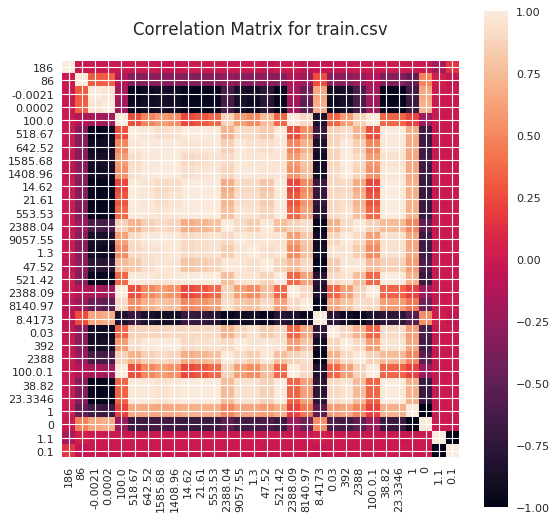

In [94]:
plotCorrelationMatrix(df1, 8)

In [95]:
## Validation 
names = [
'output',
'EngineNo', 
'sensor measurement 1',
'sensor measurement 2',
'sensor measurement 3',
'sensor measurement 4',
'sensor measurement 5',
'sensor measurement 6',
'sensor measurement 7',
'sensor measurement 8',
'sensor measurement 9',
'sensor measurement 10',
'sensor measurement 11',
'sensor measurement 12',
'sensor measurement 13',
'sensor measurement 14',
'sensor measurement 15',
'sensor measurement 16',
'sensor measurement 17',
'sensor measurement 18',
'sensor measurement 19',
'sensor measurement 20',
'sensor measurement 21',
'sensor measurement 22',
'sensor measurement 23',
'sensor measurement 24',
'sensor measurement 25',
'sensor measurement 26',
'Conditions_1',
'Conditions_2',
'Fault_mode_1',
'Fault_mode_2']

data = pd.read_csv('train.csv', delimiter=',', names=names)


data.shape

#nRowsRead = None
#df1 = pd.read_csv('train.csv', delimiter=',', nrows = nRowsRead)
#df1.dataframeName = 'train.csv'
#nRow, nCol = df1.shape
#print(f'There are {nRow} rows and {nCol} columns'

#'operational setting 1'
#'operational setting 2'
#'operational setting 3'



(128287, 32)

In [96]:
data.describe()

,output,EngineNo,sensor measurement 1,sensor measurement 2,sensor measurement 3,sensor measurement 4,sensor measurement 5,sensor measurement 6,sensor measurement 7,sensor measurement 8,...,sensor measurement 21,sensor measurement 22,sensor measurement 23,sensor measurement 24,sensor measurement 25,sensor measurement 26,Conditions_1,Conditions_2,Fault_mode_1,Fault_mode_2
count,128287.000000,128287.000000,128287.000000,128287.000000,128287.000000,128287.000000,128287.000000,128287.000000,128287.000000,128287.000000,...,128287.000000,128287.000000,128287.000000,128287.000000,128287.000000,128287.000000,128287.000000,128287.000000,0.0,0.0
mean,122.411647,105.573417,17.188895,0.409608,95.743294,485.889033,597.437902,1467.257464,1261.193016,9.900939,...,2274.030860,98.396286,25.960555,15.576366,0.283084,0.716916,0.463804,0.536196,NaN,NaN
std,83.520546,72.830372,16.521235,0.367888,12.334905,30.406253,42.451189,118.078735,136.205557,4.263813,...,142.311722,4.647175,11.685938,7.011598,0.450499,0.450499,0.498690,0.498690,NaN,NaN
min,0.000000,1.000000,-0.008700,-0.000600,60.000000,445.000000,535.480000,1242.980000,1023.770000,3.910000,...,1915.000000,84.930000,10.160000,6.010500,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,56.000000,44.000000,0.001300,0.000200,100.000000,449.440000,549.970000,1357.420000,1126.900000,5.480000,...,2212.000000,100.000000,14.340000,8.601700,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,113.000000,89.000000,19.998100,0.620000,100.000000,489.050000,606.010000,1492.930000,1273.260000,9.350000,...,2319.000000,100.000000,24.980000,14.986300,0.000000,1.000000,0.000000,1.000000,NaN,NaN
75%,173.000000,164.000000,35.001500,0.840000,100.000000,518.670000,642.340000,1586.615000,1402.200000,14.620000,...,2388.000000,100.000000,38.820000,23.294800,1.000000,1.000000,1.000000,1.000000,NaN,NaN
max,542.000000,260.000000,42.008000,0.842000,100.000000,518.670000,644.710000,1616.910000,1441.490000,14.620000,...,2388.000000,100.000000,39.890000,23.950500,1.000000,1.000000,1.000000,1.000000,NaN,NaN


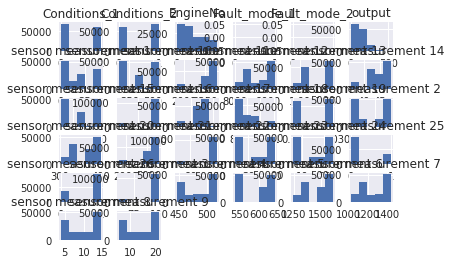

In [112]:

data.hist(bins=5)

plt.show()
#to_csv('train_final.csv', header=False, index=False)





In [ ]:
plt.hist(data,density=1, bins=20) 
plt.axis([xmin,xmax,ymin,ymax])
plt.xlabel('Engine_No')
plt.ylabel('Conditions_1')

In [ ]:
plt.show()

In [98]:
dependent_var = ['output']
index_columns_names =  ["Engine_No"]
operational_settings_columns_names = ['Conditions_1','Conditions_2','Fault_mode_1','Fault_mode_2']
sensor_measure_columns_names =["sensor measurement "+str(i) for i in range(1,26)]
input_file_column_names = index_columns_names + operational_settings_columns_names + sensor_measure_columns_names

In [99]:
train_pd = data 

In [100]:
names = [
'output',
'EngineNo', 
'sensor measurement 1',
'sensor measurement 2',
'sensor measurement 3',
'sensor measurement 4',
'sensor measurement 5',
'sensor measurement 6',
'sensor measurement 7',
'sensor measurement 8',
'sensor measurement 9',
'sensor measurement 10',
'sensor measurement 11',
'sensor measurement 12',
'sensor measurement 13',
'sensor measurement 14',
'sensor measurement 15',
'sensor measurement 16',
'sensor measurement 17',
'sensor measurement 18',
'sensor measurement 19',
'sensor measurement 20',
'sensor measurement 21',
'sensor measurement 22',
'sensor measurement 23',
'sensor measurement 24',
'sensor measurement 25',
'sensor measurement 26',
'Conditions_1',
'Conditions_2',
'Fault_mode_1',
'Fault_mode_2']

g2 = pd.read_csv('test.csv', delimiter=',', names=names)

g3 = pd.read_csv('valid.csv', delimiter=',', names=names)

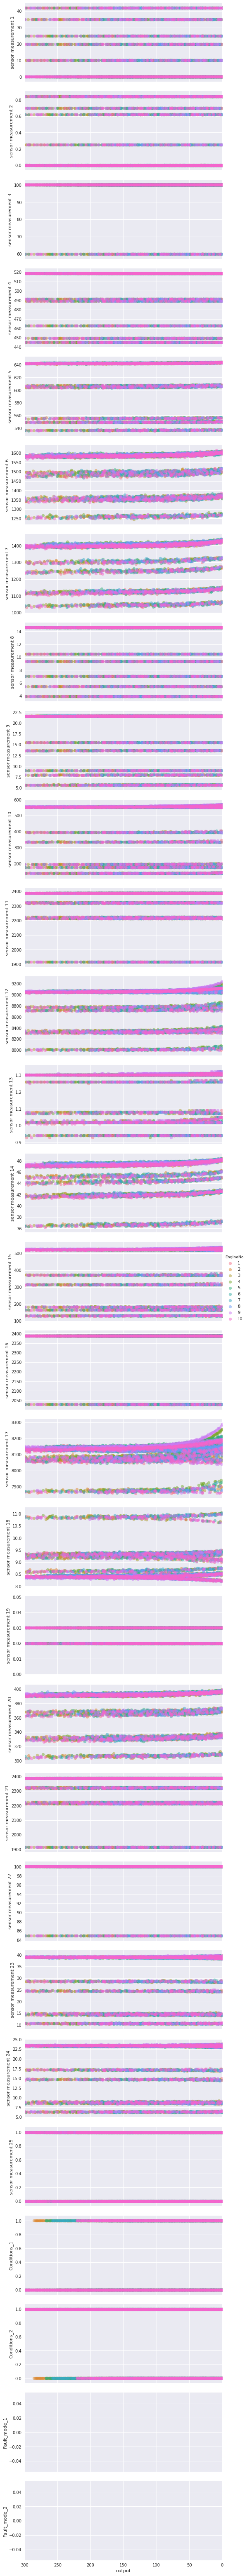

In [101]:
sns.set() 
def labels(x, y, *axes):
    for axis in axes:
        if x: axis.set_xlabel(x)
        if y: axis.set_ylabel(y)

g = sns.PairGrid(data=train_pd.query('EngineNo <= 10') ,
                 x_vars=dependent_var,
                 y_vars=sensor_measure_columns_names + operational_settings_columns_names,
                 hue="EngineNo", size=3, aspect=2.5)
g = g.map(plt.scatter, alpha=0.5)
#plt.scatter(train_pd,33)
g = g.set(xlim=(300,0))
g = g.add_legend()


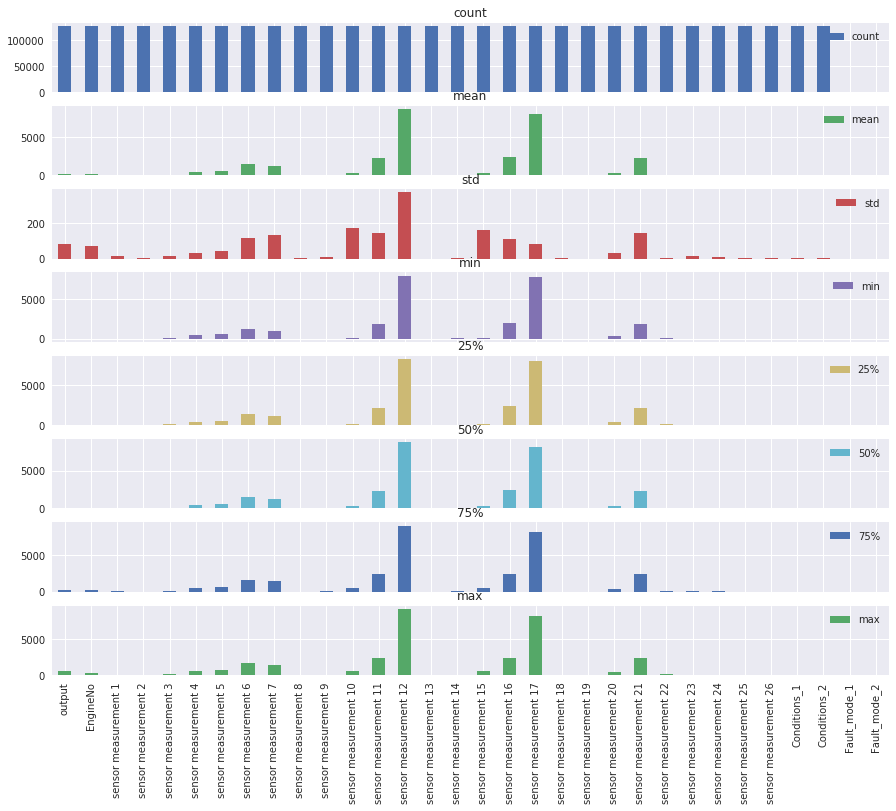

In [107]:
train_pd.head(100)

# plot an overview of whats going on in the columns
axes = train_pd.describe().T.plot.bar(subplots=True, figsize=(15,12))

In [103]:
####Second attempt on correlation matrix

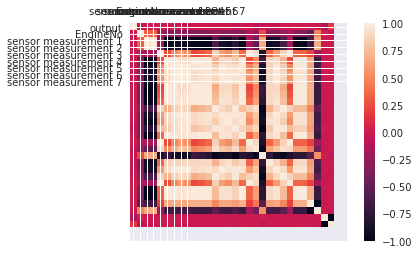

In [106]:
correlations = data.corr()
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)#11
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.draw()
plt.show()